# 💻 Exploratory Data Analysis (EDA)
### Group: 4NN
#### Dharani Palanisamy (z5260276)
#### Faiyam Islam (z5258151) 
#### Pooja Saianand (z5312416)
#### Priya Nandyal (z5312288) 

The crux of this notebook is to explore the data set and retreive interesting information, including producing some interesting plots.

The dataset contains 18000 images; 15000 manually labelled images for training and 3000 for testing. There are 14 Classes of the findings in the training data, they have the following (class_id and class_name):

0 - Aortic enlargement

1 - Atelectasis

2 - Calcification

3 - Cardiomegaly

4 - Consolidation

5 - ILD

6 - Infiltration

7 - Lung Opacity

8 - Nodule/Mass

9 - Other lesion

10 - Pleural effusion

11 - Pleural thickening

12 - Pneumothorax

13 - Pulmonary fibrosis

14 - "No finding"

The last class, 14, means, that the x-ray image is normal, i.e. has no findings. 

### Importing Packages

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from PIL import Image
import pydicom 
import os
import ast
from tqdm import tqdm
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Setting directory of all training data
# This will be different if another uses this so make sure to change the directory depending on where your datasets are
ROOT = r'C:\\Users\\User\\Downloads\\'

In [4]:
train = pd.read_csv('train.csv')
train.head()

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,R11,NaN,NaN,NaN,NaN
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,R7,NaN,NaN,NaN,NaN
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,691.0,1375.0,1653.0,1831.0
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,R10,1264.0,743.0,1611.0,1019.0
4,063319de25ce7edb9b1c6b8881290140,No finding,14,R10,NaN,NaN,NaN,NaN


In [5]:
print('Total number of rows in training images are:-', len((train['image_id'])))

Total number of rows in training images are:- 67914


In [7]:
print('Unique training images:- ', len(set(train['image_id'])))

Unique training images:-  15000


In [9]:
print('Number of total radiologists:- ', len(set(train['rad_id'])))

Number of total radiologists:-  17


In [10]:
print('Number of total classes of diagnosis', len(set(train['class_name'])))

Number of total classes of diagnosis 15


In [11]:
print(set(train['class_name']))

{'Pneumothorax', 'Aortic enlargement', 'Lung Opacity', 'Other lesion', 'Pleural effusion', 'Atelectasis', 'Consolidation', 'Cardiomegaly', 'Pulmonary fibrosis', 'Infiltration', 'Nodule/Mass', 'No finding', 'Pleural thickening', 'ILD', 'Calcification'}


image_id  class_name  x_min  y_min  x_max  y_max
rad_id class_id                                                  
R1     14            1995        1995      0      0      0      0
R10    0             2349        2349   2349   2349   2349   2349
       1              115         115    115    115    115    115
       2              139         139    139    139    139    139
       3             1835        1835   1835   1835   1835   1835
...                   ...         ...    ...    ...    ...    ...
R9     10            1045        1045   1045   1045   1045   1045
       11            2466        2466   2466   2466   2466   2466
       12              75          75     75     75     75     75
       13            1757        1757   1757   1757   1757   1757
       14            1979        1979      0      0      0      0

[155 rows x 6 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024080572E88>,
      dtype=object)

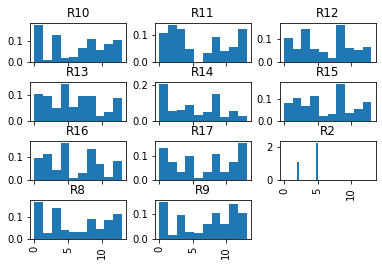

In [12]:
# Let's try to understand how each of the radiologist is trying to categorise the X-rays 

df_test = train.groupby(['rad_id', 'class_id']).count()
display(df_test) 
cond = train['class_id'] != 14
train[cond].class_id.hist(by = train[cond].rad_id, sharey = False, sharex = True, density = 1)

In [13]:
image = pydicom.dcmread('94b4487a6f96741da2745343df491908.dicom') # just a random x-ray photo I chose in the train file

In [14]:
image

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 156
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 94b4487a6f96741da2745343df491908
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.3.4
(0002, 0013) Implementation Version Name         SH: ''
(0002, 0016) Source Application Entity Title     AE: 'VITREA1'
-------------------------------------------------
(0010, 0040) Patient's Sex                       CS: ''
(0028, 0002) Samples per Pixel                   US: 1
(0028, 0004) Photometric Interpretation          CS: 'MONOCHROME2'
(0028, 0010) Rows                                US: 2975
(0028, 0011) Columns                             US: 2594
(0028, 0030) Pixel Spacing             

In [16]:
train.iloc[2]['x_min']

691.0

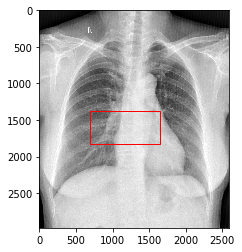

In [19]:
fig, ax = plt.subplots(1) 
ax.imshow(image.pixel_array, cmap = "gray")
length = train.iloc[2]['x_max'] - train.iloc[2]['x_min']
width = train.iloc[2]['y_max'] - train.iloc[2]['y_min']
box = matplotlib.patches.Rectangle((train.iloc[2]['x_min'], train.iloc[2]['y_min']), length, width, linewidth = 1, facecolor = 'none', 
                                  edgecolor = 'r')
ax.add_patch(box)
plt.show()

We have successfully imported a single x-ray image to the notebook and have identified the bounding box, however further
investigation using object detection will assist in classifying particular diseases to each image. 

In [4]:
train.shape

(67914, 8)

In [5]:
train['image_id'].nunique()

15000

In [6]:
len(set(os.listdir(ROOT + 'train')))

13547

In [7]:
list_images = []
for i in os.listdir(ROOT + 'train'):
    i = i.split('.')[0]
    list_images.append(i)

In [8]:
act_images = []
for i in train['image_id']:
    if i in list_images:
        act_images.append(i)

In [9]:
train_new = train[train['image_id'].isin(act_images)]

In [10]:
train_new.image_id.nunique()

13547

In [11]:
train_new.head()

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,R11,NaN,NaN,NaN,NaN
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,R7,NaN,NaN,NaN,NaN
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,691.0,1375.0,1653.0,1831.0
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,R10,1264.0,743.0,1611.0,1019.0
4,063319de25ce7edb9b1c6b8881290140,No finding,14,R10,NaN,NaN,NaN,NaN


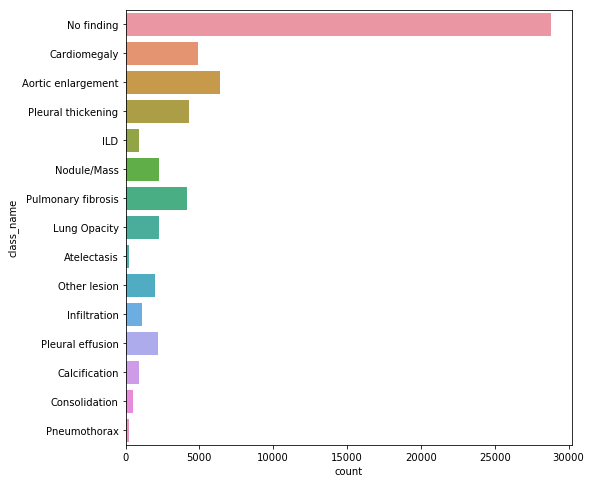

In [12]:
plt.figure(figsize=(8,8))
sns.countplot(y='class_name',data = train_new)
plt.show()

### Distribution of chest abnormalities

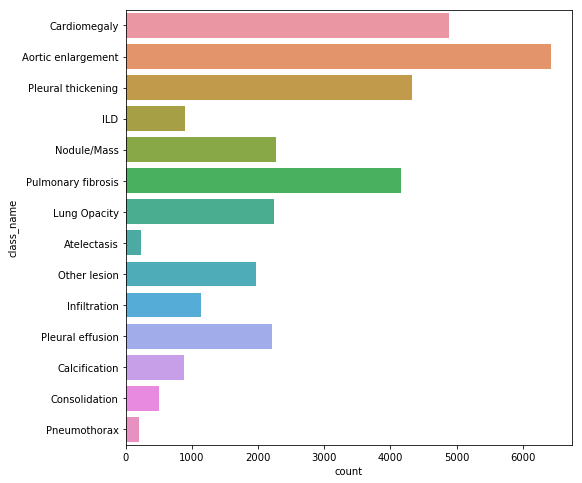

In [13]:
plt.figure(figsize=(8,8))
sns.countplot(y = 'class_name', data = train_new[train_new['class_name'] != 'No finding']);
plt.show()

In [14]:
train_new.image_id.value_counts()

03e6ecfa6f6fb33dfeac6ca4f9b459c9    57
e31be972e181987a8600a8700c1ebe88    48
6d5acf3f8a973a26844d617fffe72998    46
3a302fbbbf3364aa1a7731b59e6b98ec    46
c699f16ba0b86f474390da9515bcad7a    42
                                    ..
325bd96eac745c2604b9f7e7b60ebc36     3
d956dc82a16a8b50ea9305d881304abc     3
43d334915f96e4cd350534dd47173791     3
2330c0e643b79d87e8229abfc13ca9aa     3
699168263676809f088d9c7b9769b283     3
Name: image_id, Length: 13547, dtype: int64

In [15]:
# Data containing the same image_id i.e same class_name and class_id but different rad_id and coordinates 
train_new[train_new['image_id'] == '03e6ecfa6f6fb33dfeac6ca4f9b459c9']

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max
757,03e6ecfa6f6fb33dfeac6ca4f9b459c9,Nodule/Mass,8,R9,562.0,2045.0,629.0,2112.0
1906,03e6ecfa6f6fb33dfeac6ca4f9b459c9,Nodule/Mass,8,R10,2046.0,778.0,2308.0,1111.0
2087,03e6ecfa6f6fb33dfeac6ca4f9b459c9,Nodule/Mass,8,R10,1766.0,634.0,2645.0,2567.0
2489,03e6ecfa6f6fb33dfeac6ca4f9b459c9,Nodule/Mass,8,R8,2239.0,1592.0,2336.0,1690.0
2610,03e6ecfa6f6fb33dfeac6ca4f9b459c9,Nodule/Mass,8,R8,515.0,1732.0,589.0,1799.0
3318,03e6ecfa6f6fb33dfeac6ca4f9b459c9,Nodule/Mass,8,R8,2030.0,792.0,2358.0,1237.0
5824,03e6ecfa6f6fb33dfeac6ca4f9b459c9,Nodule/Mass,8,R9,628.0,1186.0,696.0,1247.0
6628,03e6ecfa6f6fb33dfeac6ca4f9b459c9,Nodule/Mass,8,R8,2018.0,1302.0,2088.0,1372.0
9194,03e6ecfa6f6fb33dfeac6ca4f9b459c9,Nodule/Mass,8,R9,1775.0,750.0,1852.0,831.0
12042,03e6ecfa6f6fb33dfeac6ca4f9b459c9,Nodule/Mass,8,R8,424.0,1349.0,493.0,1418.0


In [16]:
train_new.rad_id.nunique()

17

### Distribution of radiologists making the observation 

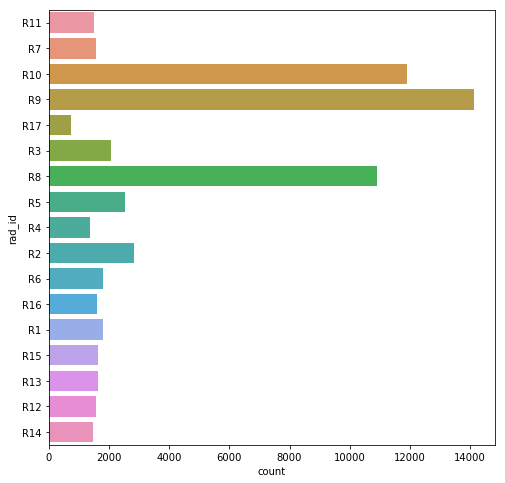

In [17]:
plt.figure(figsize = (8,8))
sns.countplot(y = 'rad_id',data = train_new)
plt.show()

In [18]:
train_new.isna().sum()

image_id          0
class_name        0
class_id          0
rad_id            0
x_min         28794
y_min         28794
x_max         28794
y_max         28794
dtype: int64

In [19]:
train_new[train_new['class_name'] != 'No finding'].isna().sum(axis=0) 

image_id      0
class_name    0
class_id      0
rad_id        0
x_min         0
y_min         0
x_max         0
y_max         0
dtype: int64

In [20]:
df1 = train_new[train_new['class_name']!= 'No finding'] # here we create a dataframe which excludes 'No Finding' in class_name

In [21]:
df1.head()

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,691.0,1375.0,1653.0,1831.0
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,R10,1264.0,743.0,1611.0,1019.0
5,1c32170b4af4ce1a3030eb8167753b06,Pleural thickening,11,R9,627.0,357.0,947.0,433.0
6,0c7a38f293d5f5e4846aa4ca6db4daf1,ILD,5,R17,1347.0,245.0,2188.0,2169.0
7,47ed17dcb2cbeec15182ed335a8b5a9e,Nodule/Mass,8,R9,557.0,2352.0,675.0,2484.0


In [22]:
df1.shape

(32334, 8)

In [23]:
df1.describe() # basic statistics of the dataframe (excluding 'No finding')

,class_id,x_min,y_min,x_max,y_max
count,32334.000000,32334.000000,32334.000000,32334.000000,32334.000000
mean,6.425465,1050.235480,1064.107008,1491.938764,1456.406105
std,4.571754,563.855707,553.119402,593.862247,581.701703
min,0.000000,0.000000,0.000000,68.000000,103.000000
25%,3.000000,602.250000,625.000000,1011.000000,1008.000000
50%,7.000000,1015.000000,932.000000,1569.000000,1412.000000
75%,11.000000,1454.000000,1470.000000,1945.000000,1913.000000
max,13.000000,2934.000000,3133.000000,3056.000000,3384.000000


### Distribution of the coordinates of each object's bounding box 

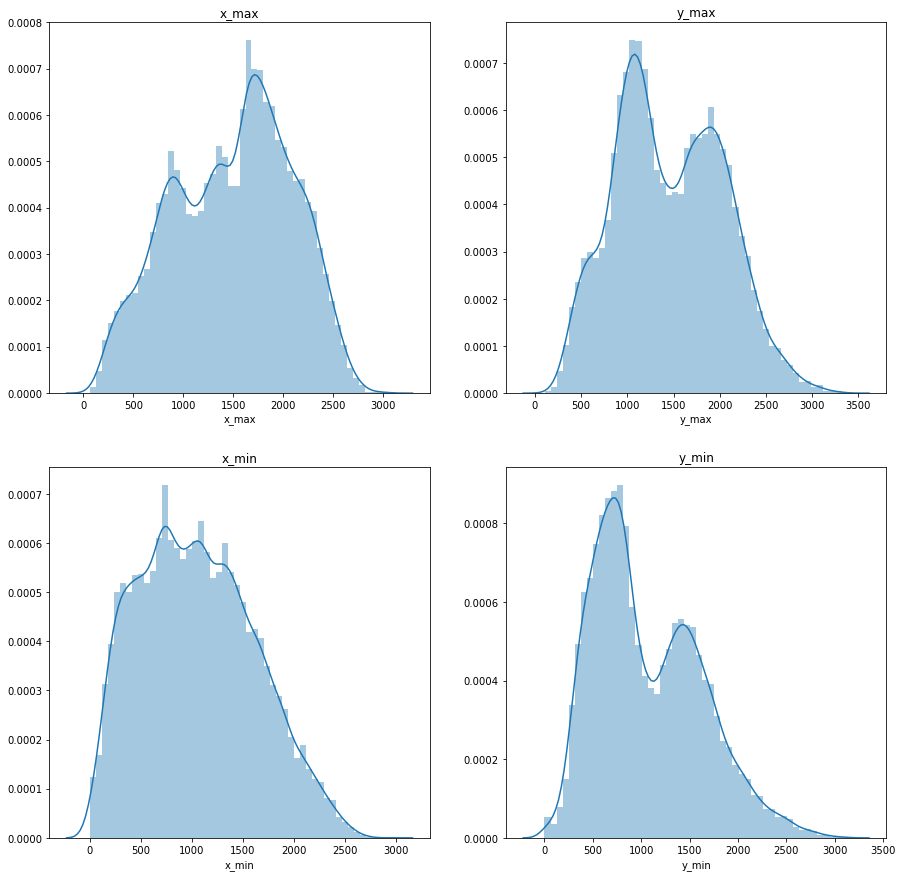

In [24]:
_, ax = plt.subplots(figsize=(15,15), ncols=2, nrows=2)

ax[0][0].set_title("x_max")
ax[0][1].set_title("y_max")
ax[1][0].set_title("x_min")
ax[1][1].set_title("y_min")

sns.distplot(df1['x_max'],ax=ax[0][0])
sns.distplot(df1['y_max'],ax=ax[0][1])
sns.distplot(df1['x_min'],ax=ax[1][0])
sns.distplot(df1['y_min'],ax=ax[1][1])

plt.show()

In [25]:
path = ROOT + 'train/00dc70e84d141255f7fc6f8038bdd72e.dicom' # this is just an example of one x-ray dicom file 

In [26]:
dicom = pydicom.dcmread(path)

In [27]:
print(dicom)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 156
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 00dc70e84d141255f7fc6f8038bdd72e
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.3.4
(0002, 0013) Implementation Version Name         SH: ''
(0002, 0016) Source Application Entity Title     AE: 'VITREA1'
-------------------------------------------------
(0010, 0040) Patient's Sex                       CS: 'O'
(0028, 0002) Samples per Pixel                   US: 1
(0028, 0004) Photometric Interpretation          CS: 'MONOCHROME2'
(0028, 0010) Rows                                US: 2430
(0028, 0011) Columns                             US: 1994
(0028, 0030) Pixel Spacing            

In [28]:
dicom.Rows,dicom.Columns,dicom.PatientSex

(2430, 1994, 'O')

In [29]:
rows, columns, sex = [], [], []
ids = df1['image_id'].unique()
for i in ids:
    path = ROOT + 'train/' + i + '.dicom'
    dicom = pydicom.dcmread(path, stop_before_pixels=True)
    rows.append(dicom.Rows)
    columns.append(dicom.Columns)
    sex.append(dicom.PatientSex)

In [30]:
# Construct a dataframe of the rows and columns which represent the pixels of each image and the sex of each patient
info = pd.DataFrame({'image_id':ids, 'rows':rows, 'columns':columns, 'sex':sex})
info.head()

,image_id,rows,columns,sex
0,9a5094b2563a1ef3ff50dc5c7ff71345,2336,2080,F
1,051132a778e61a86eb147c7c6f564dfe,2880,2304,F
2,1c32170b4af4ce1a3030eb8167753b06,3072,2540,M
3,0c7a38f293d5f5e4846aa4ca6db4daf1,2555,2285,M
4,47ed17dcb2cbeec15182ed335a8b5a9e,3353,2568,F


In [31]:
info.shape

(3949, 4)

### Distribution of sex for each patient's chest x-ray

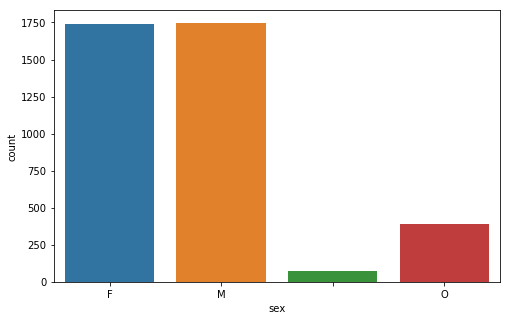

In [32]:
plt.figure(figsize=(8,5))
sns.countplot(info['sex']);

In [36]:
train = pd.merge(df1,info) # combine the train.csv dataset (without 'No finding') and the data from the dicom x-rays

In [37]:
train.head()

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max,rows,columns,sex
0,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,691.0,1375.0,1653.0,1831.0,2336,2080,F
1,9a5094b2563a1ef3ff50dc5c7ff71345,Pleural effusion,10,R9,1789.0,1729.0,1875.0,1992.0,2336,2080,F
2,9a5094b2563a1ef3ff50dc5c7ff71345,Pleural thickening,11,R9,1789.0,1729.0,1875.0,1992.0,2336,2080,F
3,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R9,692.0,1375.0,1657.0,1799.0,2336,2080,F
4,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R8,689.0,1313.0,1666.0,1763.0,2336,2080,F


In [114]:
train.shape

(32334, 11)

### Distribution of the total pixels in each x-ray scan

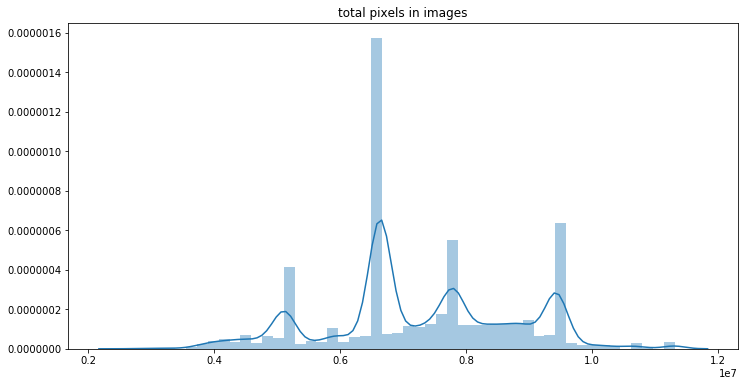

In [39]:
plt.figure(figsize=(12,6))
sns.distplot(train['rows']*train['columns']);
plt.title("total pixels in images");

### Distribution of the width of bounding box for each x-ray scan 

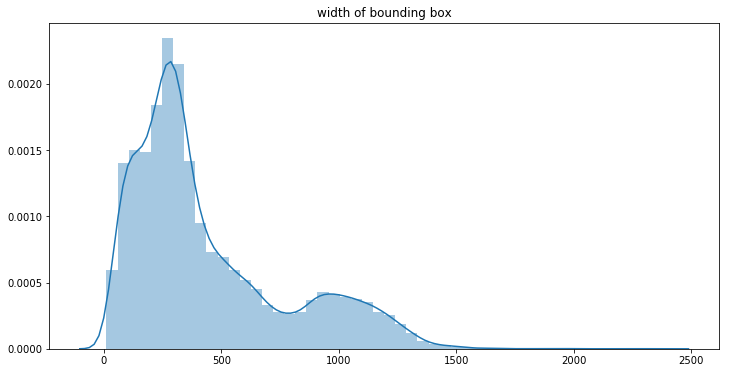

In [40]:
# These are the width of all the bounding boxes for all scans, we will be constructing plots for each class below. 
plt.figure(figsize=(12,6))
sns.distplot(train['x_max'] - train['x_min']);
plt.title("width of bounding box");

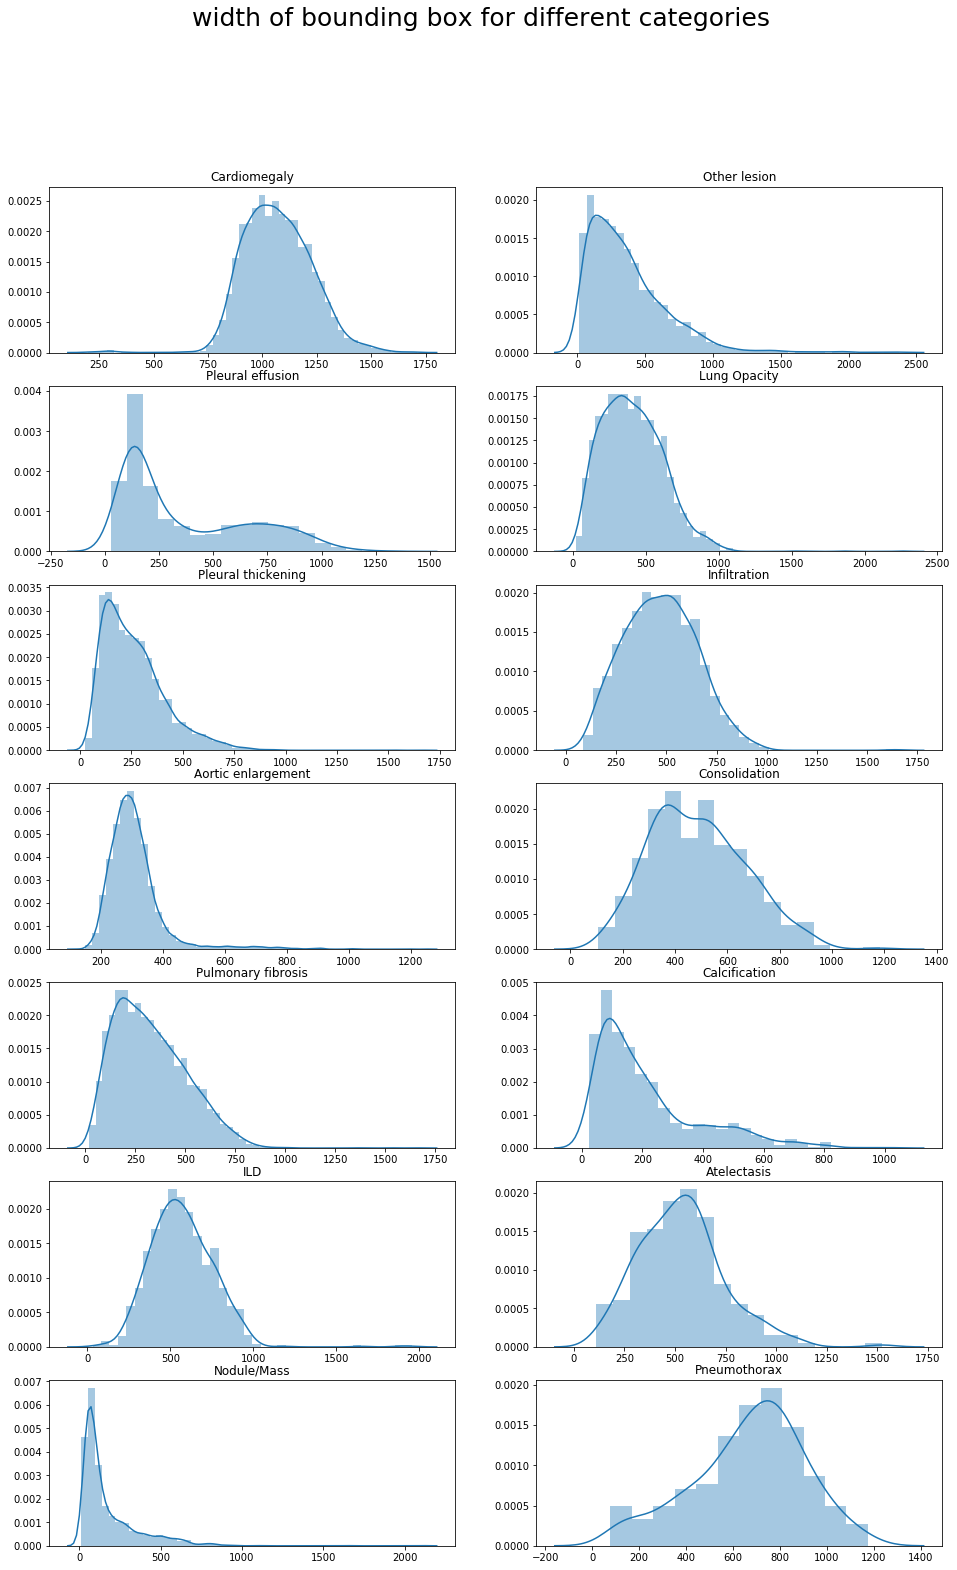

In [59]:
fig,ax = plt.subplots(7,2,figsize=(16,25))
fig.suptitle('width of bounding box for different categories',fontsize=25)
for j,i in enumerate(train['class_name'].unique()):
    ttrain = train[train['class_name'] == i]
    sns.distplot(ttrain['x_max'] - ttrain['x_min'],ax = ax[j%7,j//7]);
    ax[j%7,j//7].title.set_text(i);
plt.show()

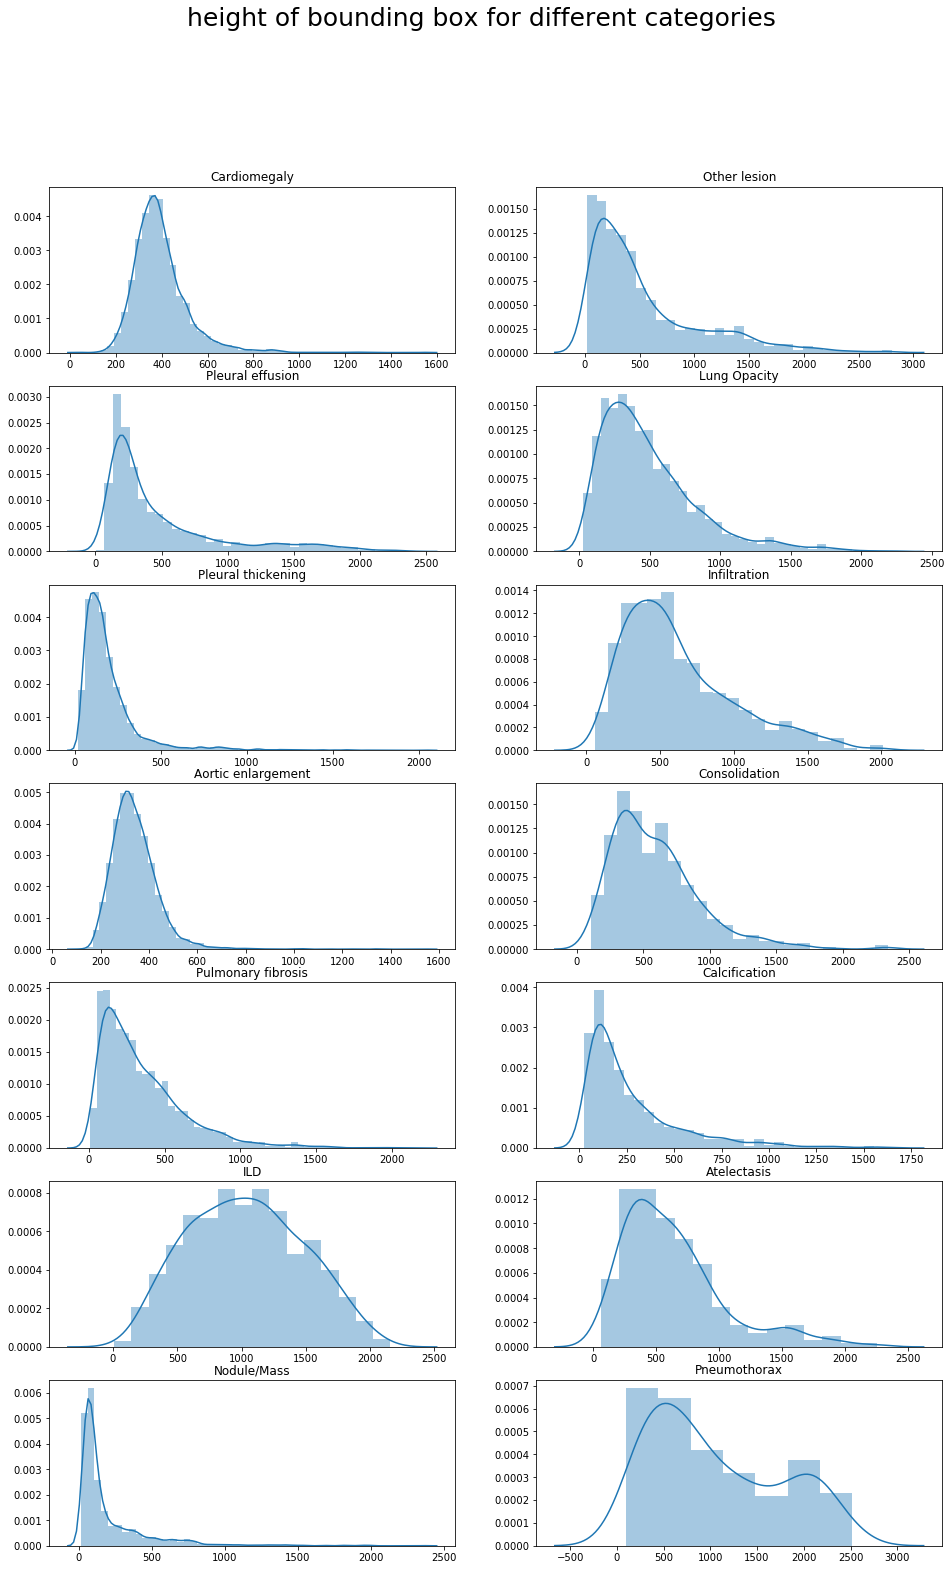

In [87]:
fig,ax = plt.subplots(7,2,figsize=(16,25))
fig.suptitle('height of bounding box for different categories',fontsize=25)
for j,i in enumerate(train['class_name'].unique()):
    ttrain = train[train['class_name'] == i]
    sns.distplot(ttrain['y_max'] - ttrain['y_min'],ax = ax[j%7,j//7]);
    ax[j%7,j//7].title.set_text(i);
plt.show()

### Distribution of the area of the bounding boxes in each x-ray scan

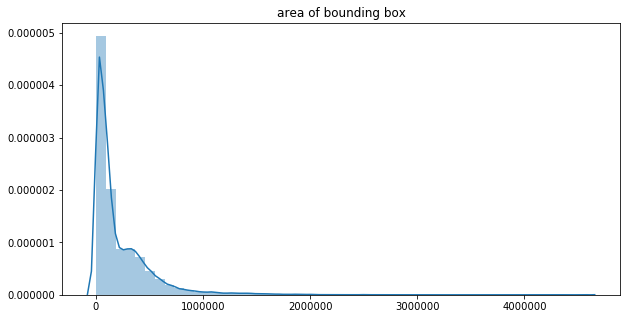

In [91]:
# These are all the areas of the bounding boxes detected in each scan, we will be investigating each category next. 
plt.figure(figsize=(10,5))
sns.distplot((train['y_max'] - train['y_min']) * (train['x_max'] - train['x_min']));
plt.title("area of bounding box");

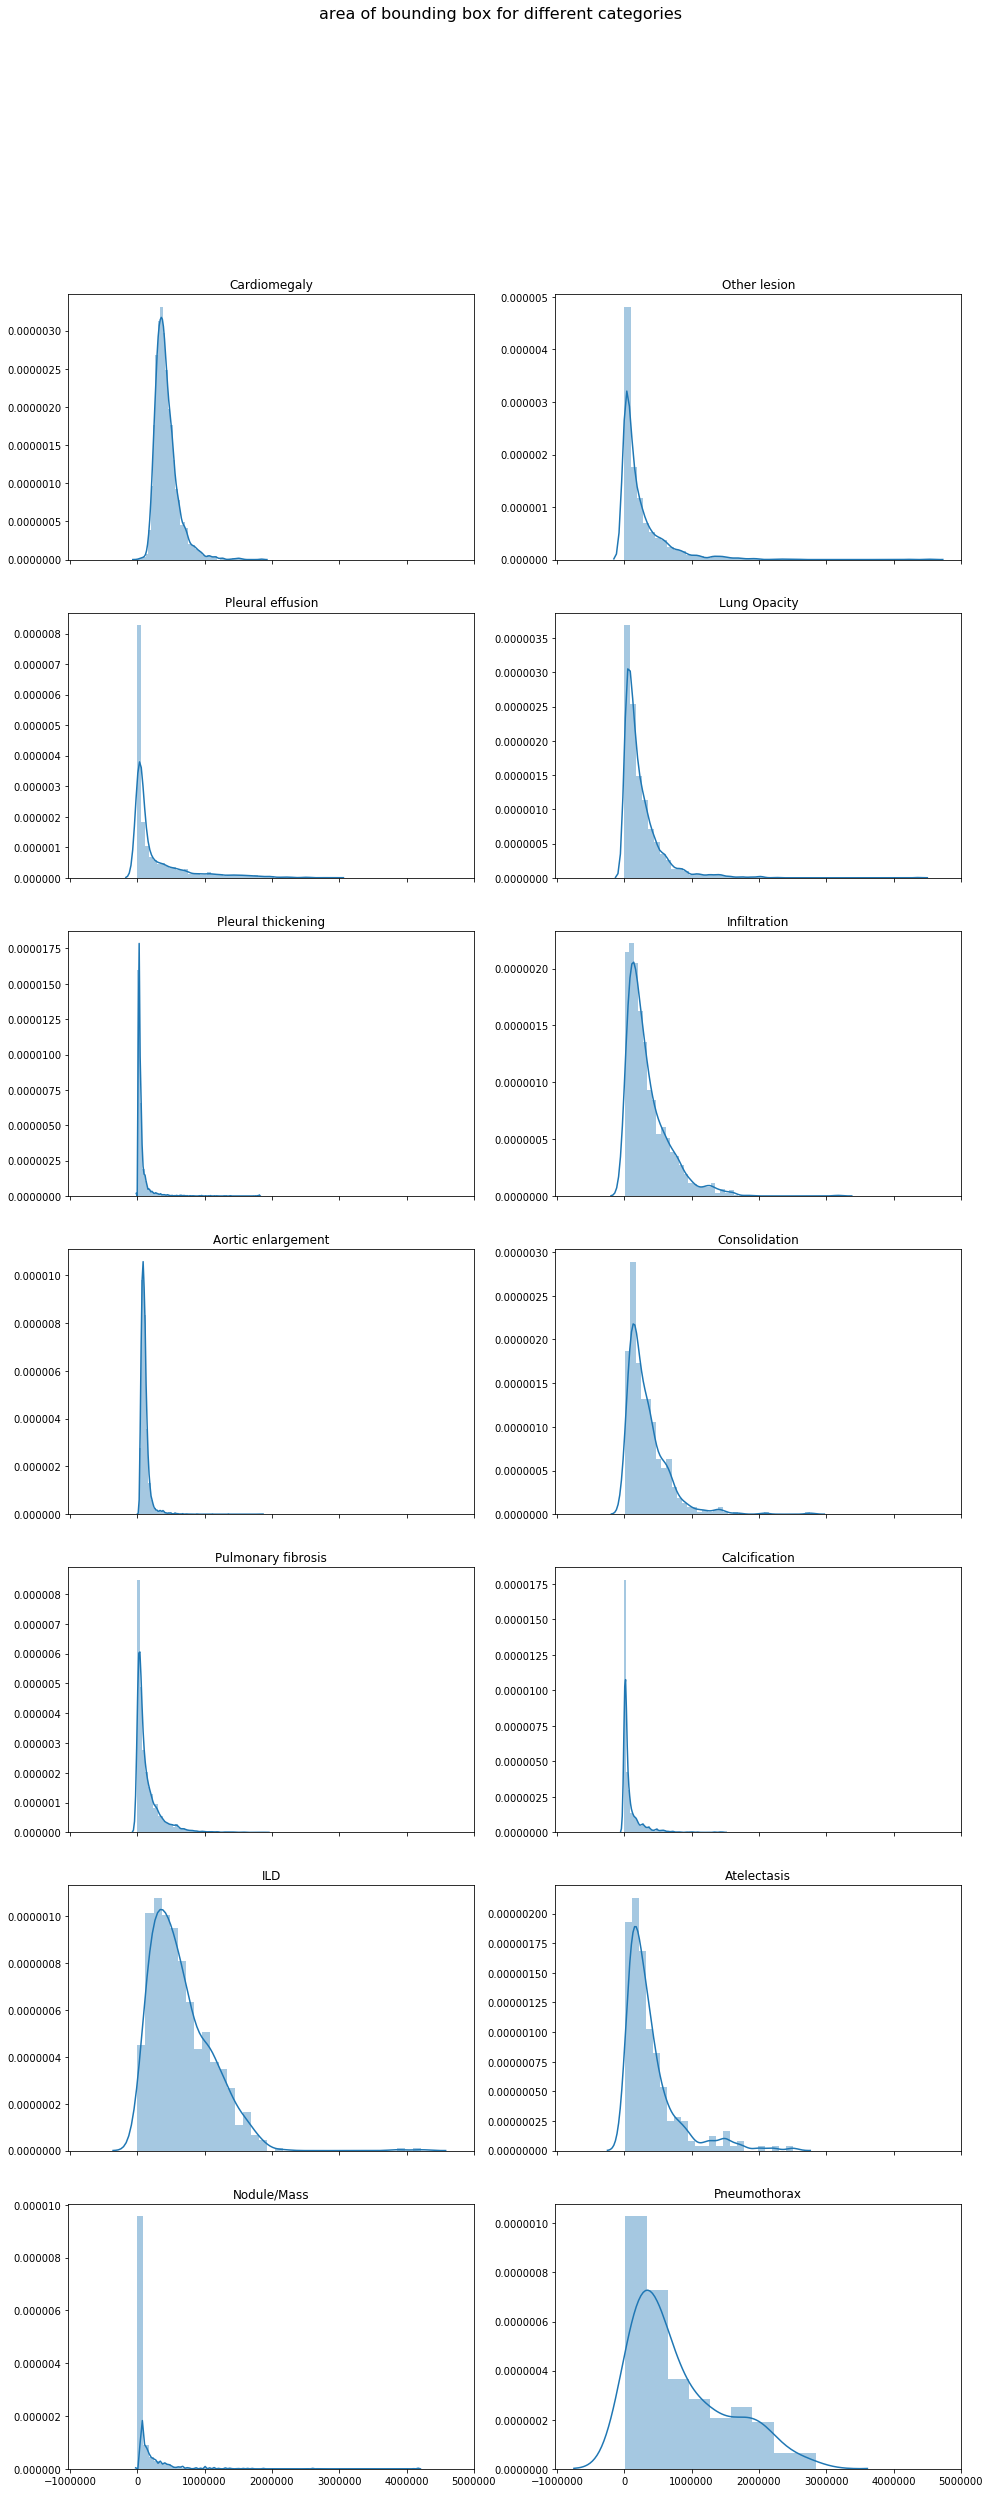

In [94]:
fig, axes = plt.subplots(7, 2, figsize=(16, 40), sharex=True)
fig.suptitle("area of bounding box for different categories", fontsize=16)
for j, i in enumerate(train.class_name.unique()):
    ttrain = train[train['class_name'] == i]
    sns.distplot((ttrain['y_max'] - ttrain['y_min']) * (ttrain['x_max'] - ttrain['x_min']), ax=axes[j%7, j//7]);
    axes[j%7, j//7].title.set_text(i);
plt.show()

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 158
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Computed Radiography Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: bda862be2d20d538b558300c97b8255c
(0002, 0010) Transfer Syntax UID                 UI: JPEG 2000 Image Compression (Lossless Only)
(0002, 0012) Implementation Class UID            UI: 1.2.3.4
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0010, 0040) Patient's Sex                       CS: 'O'
(0028, 0002) Samples per Pixel                   US: 1
(0028, 0004) Photometric Interpretation          CS: 'MONOCHROME2'
(0028, 0010) Rows                                US: 2500
(0028, 0011) Columns                             US: 2048
(0028, 0030) Pixel Spacing                       DS: [0.168, 0.168]
(0028, 0034)

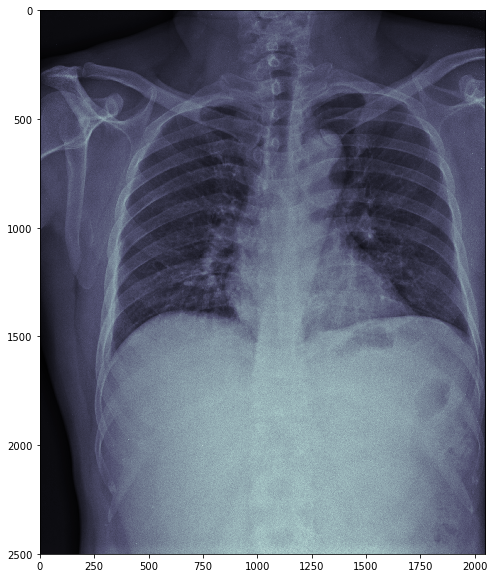

In [131]:
myfile = pydicom.read_file(path)
print(myfile)
plt.figure(figsize=(12,10))
plt.imshow(myfile.pixel_array,plt.cm.bone)
plt.show()

### Converting dicom files to np array
Source: https://www.kaggle.com/raddar/convert-dicom-to-np-array-the-correct-way

In [104]:
from pydicom.pixel_data_handlers.util import apply_voi_lut

# Function used to convert dicom x-ray files to image
def read_xray(path,voi_lut=True,fix_monochrome=True):
    dicom = pydicom.read_file(path)
    if voi_lut:
        data = apply_voi_lut(dicom.pixel_array,dicom)
    else:
        data = dicom.pixel_array
    if fix_monochrome and dicom.PhotometricInterpretation == 'MONOCHROME1':
        data = np.amax(data) - data
    
    data = data - np.min(data)
    data = data / np.max(data)
    return (data * 255).astype(np.uint8)

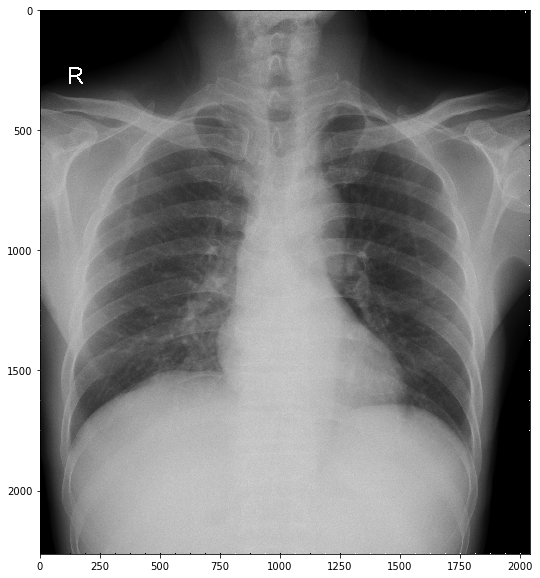

In [105]:
_ = plt.figure(figsize=(10,10))
plt.imshow(read_xray(path),cmap='gray');

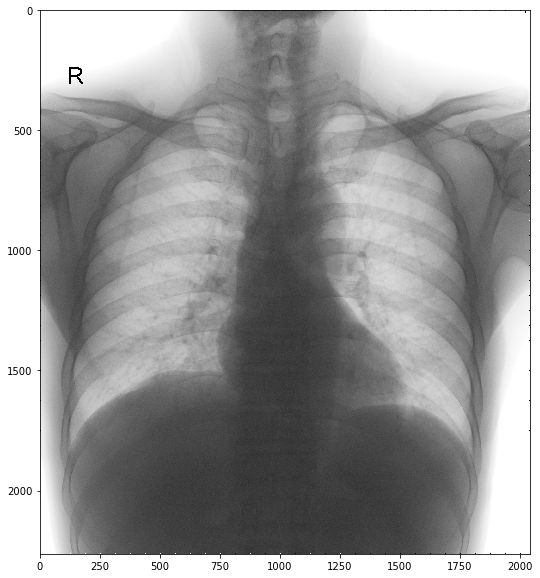

In [106]:
_ = plt.figure(figsize=(10,10))
plt.imshow(read_xray(path,fix_monochrome=False),cmap='gray');
# The difference between this image is that this is not a monochrome image